# Descriptive Analysis

## Libraries, options, paths, and functions

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set options
pd.set_option('display.float_format', '{:,.2f}'.format)

## Load data

In [2]:
# load mevs_ca data
with pd.HDFStore('./stats_can_data/mevs_ca.hdf5') as save:
    mevs_ca = save['mevs_ca']
    metadata = save.get_storer('mevs_ca').attrs.metadata

display(mevs_ca.tail())


,ref_date,geo,pop_ca,gdp_ca,year,quarter,gdp_ca_g,pop_ca_g
238,2020-07-01,Canada,38037204,2014029,2020,3,41.08,0.39
239,2020-10-01,Canada,38033014,2058185,2020,4,9.06,-0.04
240,2021-01-01,Canada,38068872,2082980,2021,1,4.91,0.38
241,2021-04-01,Canada,38153211,2066339,2021,2,-3.16,0.89
242,2021-07-01,Canada,38246108,2093927,2021,3,5.45,0.98


## Explore
### Correlation

In [3]:
# correlation analysis
display(mevs_ca.corr())

/var/folders/t8/tx810ccd5gs6q7rmd21g5rs40000gn/T/ipykernel_23048/2101479921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(mevs_ca.corr())


,pop_ca,gdp_ca,year,quarter,gdp_ca_g,pop_ca_g
pop_ca,1.00,0.99,1.00,0.01,-0.23,-0.36
gdp_ca,0.99,1.00,0.99,0.01,-0.21,-0.34
year,1.00,0.99,1.00,-0.01,-0.23,-0.37
quarter,0.01,0.01,-0.01,1.00,0.02,0.41
gdp_ca_g,-0.23,-0.21,-0.23,0.02,1.00,0.09
pop_ca_g,-0.36,-0.34,-0.37,0.41,0.09,1.00


### Population

<Axes: xlabel='ref_date'>

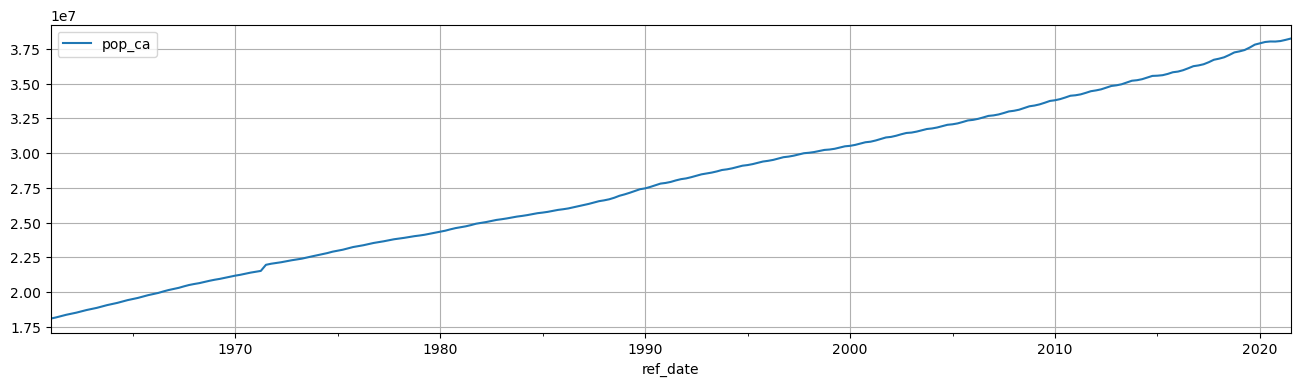

In [4]:
# population
mevs_ca.plot(x='ref_date', y='pop_ca', kind='line', figsize=(16,4), grid=True)


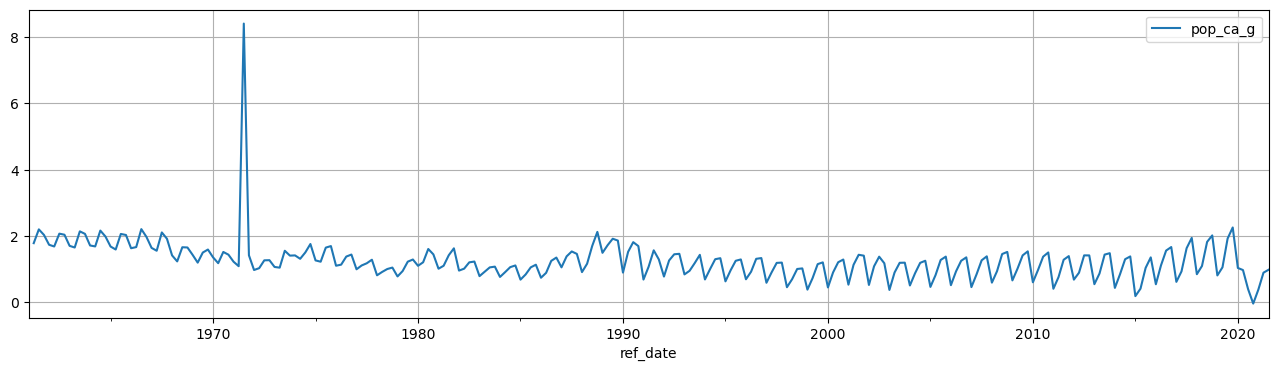

,pop_ca_g
quarter,
1,0.87
2,1.09
3,1.55
4,1.48


Population growth has quarterly seasonality - it is lowest in Q1 and Q2 and highest in Q3 and Q4.


In [5]:
# population growth
mevs_ca.plot(x='ref_date', y='pop_ca_g', kind='line', figsize=(16,4), grid=True)
plt.show()
display(mevs_ca.pivot_table(index='quarter',values=['pop_ca_g'], aggfunc='mean'))
print('Population growth has quarterly seasonality - it is lowest in Q1 and Q2 and highest in Q3 and Q4.')

### GDP

<Axes: xlabel='pop_ca', ylabel='gdp_ca'>

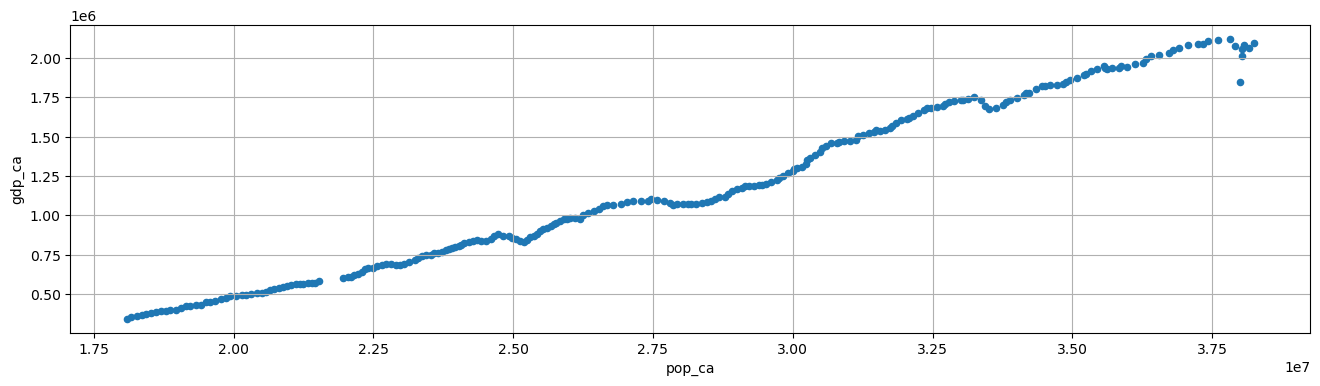

In [6]:
mevs_ca.plot(x='pop_ca', y='gdp_ca', kind='scatter', figsize=(16,4), grid=True)


<Axes: xlabel='ref_date'>

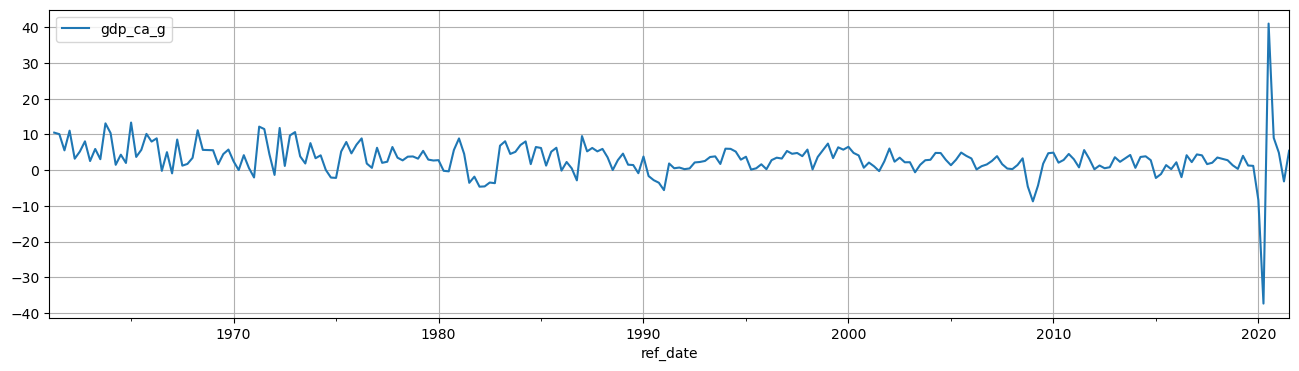

In [7]:
mevs_ca.plot(x='ref_date', y='gdp_ca_g', kind='line', figsize=(16,4), grid=True)
